<h1>Kaggle: Houses Prices - Advanced Regression Techniques<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción" data-toc-modified-id="Descripción-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Descripción</a></span></li><li><span><a href="#Carga-de-los-datos" data-toc-modified-id="Carga-de-los-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carga de los datos</a></span></li><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Análisis exploratorio</a></span></li><li><span><a href="#Preprocesado-de-datos" data-toc-modified-id="Preprocesado-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocesado de datos</a></span><ul class="toc-item"><li><span><a href="#Ajuste-de-la-variable-dependiente-a-la-métrica-de-evaluación" data-toc-modified-id="Ajuste-de-la-variable-dependiente-a-la-métrica-de-evaluación-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ajuste de la variable dependiente a la métrica de evaluación</a></span></li><li><span><a href="#Categorías" data-toc-modified-id="Categorías-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorías</a></span></li><li><span><a href="#Orden-del-dataset" data-toc-modified-id="Orden-del-dataset-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Orden del dataset</a></span></li><li><span><a href="#Pre-procesado" data-toc-modified-id="Pre-procesado-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Pre-procesado</a></span></li><li><span><a href="#Subconjuntos-de-entrenamiento-y-validación" data-toc-modified-id="Subconjuntos-de-entrenamiento-y-validación-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Subconjuntos de entrenamiento y validación</a></span></li></ul></li><li><span><a href="#Entrenamiento-y-test-del-modelo-(Random-Forest)" data-toc-modified-id="Entrenamiento-y-test-del-modelo-(Random-Forest)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Entrenamiento y test del modelo (Random Forest)</a></span></li><li><span><a href="#Importancia-de-las-variables" data-toc-modified-id="Importancia-de-las-variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Importancia de las variables</a></span></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>One hot encoding</a></span></li><li><span><a href="#Eliminación-de-redundancia" data-toc-modified-id="Eliminación-de-redundancia-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Eliminación de redundancia</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Aplicación-del-modelo-al-conjunto-de-test" data-toc-modified-id="Aplicación-del-modelo-al-conjunto-de-test-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Aplicación del modelo al conjunto de test</a></span></li></ul></div>

> Notebook creado para participar en la competición de Kaggle [house-prices-advanced-regression-techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## Descripción

"Pídale a un comprador de vivienda que describa la casa de sus sueños, y es probable que no empiece con la altura del techo del sótano o la proximidad a las vías del tren. Pero el conjunto de datos de esta competición demuestra que influye mucho más en los precios que el número de habitaciones.

Con 79 variables explicativas que describen (casi) todas las características de los hogares residenciales en Ames (Iowa), esta competición le desafía a predecir el precio final de cada hogar."

* Descargas + Información completa sobre los datasets: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import os

In [3]:
set_plot_sizes(12,14,16)

## Carga de los datos

Primero tendremos que descargar los datos desde la [web de Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), y los dejamos en el subdirectorio /data.

A continuación volcamos la información del fichero de entrenamiento en un dataframe de Pandas (y el de test en otro). Usaremos la función info para ver sus muestras (filas) y sus variables (columnas). De estas últimas obtendremos también el tipo y el número de valores que no son NaN.

In [4]:
df_train = pd.read_csv(f'data/train.csv', low_memory=False)
df_test = pd.read_csv(f'data/test.csv', low_memory=False)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Análisis exploratorio

Lo primero que haremos siempre después de cargar los datos será echar un primer vistazo a los mismos, para saber con qué estamos tratando. Creamos una función auxiliar (recubriendo a la función display de Python) para visualizar el contenido de un dataframe con un límite preestablecido de filas y columnas, y vemos una muestra de nuestro dataframe. Usamos T para transponer filas por columnas y visualizar mejor los datos en el notebook:

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)

display_all(df_train.head().T)

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


Nuestra variable objetivo o valor a predecir se trata de la columna 'SalePrice'. El resto serán variables dependientes.

Echamos también un vistazo a los estadísticos básicos para todas las columnas, lo que nos dará un poco de información para conocer el contenido de las columnas o variables dependientes:

In [6]:
display_all(df_train.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En este momento no vamos a hacer más análisis exploratorio, ya que no tiene mucho sentido quitar variables sin más.

## Preprocesado de datos

### Ajuste de la variable dependiente a la métrica de evaluación

Siempre es importante saber qué tipo de métrica se va a usar en un proyecto para la evaluación del modelo. En este caso Kaggle nos dice que evaluará usando RMSLE (Root Mean Squared Log Error), entre la predicción y el valor real de cada precio (columna SalePrice). Por ello usaremos el logaritmo del precio, y así el error RMSE nos dará directamente el RMLSE:

In [7]:
df_train.SalePrice = np.log(df_train.SalePrice)

Para las columnas que contienen las variables dependientes observamos que tenemos una mezcla de datos numéricos y datos categóricos. 

### Categorías

Para las categorías lo que hacemos es convertir las columnas cuyos valores son strings al tipo category de Pandas. De tal forma que para Pandas ya es como si fueran variables numéricas, puesto que internamente asigna a cada string un código numérico.

Primeramente podemos echar un vistazo al número de valores únicos dentro de cada variable:

In [8]:
unique_counts = pd.DataFrame.from_records([(col, df_train[col].nunique()) 
                                           for col in df_train.columns if df_train[col].dtype == 'object'],
                                           columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
1,Street,2
2,Alley,2
28,CentralAir,2
5,Utilities,2
7,LandSlope,3
38,PoolQC,3
37,PavedDrive,3
34,GarageFinish,3
21,BsmtQual,4
18,ExterQual,4


Usamos la función `train_cats` para convertir todas las columnas del dataframe de tipo object a tipo category:

In [9]:
train_cats(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null catego

Además de nuestro objetivo hemos conseguido reducir el tamaño en memoria del dataframe a una cuarta parte del original!

### Orden del dataset

Analizamos la componente temporal del dataset. En este caso tenemos dos variables, YrSold y MoSold, por las que nos podría interesar ordenar los datos. YrSold contempla valores desde 2006 a 2010 según hemos podido ver en los estadísticos básicos. Vamos a observar de cuándo son los datos del conjunto de test:

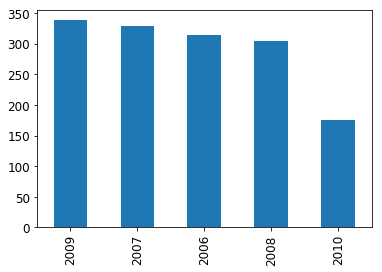

In [10]:
df_train['YrSold'].value_counts().plot.bar();

Vamos a observar de cuándo son los datos del conjunto de test:

In [11]:
df_test['YrSold'].describe()

count    1459.000000
mean     2007.769705
std         1.301740
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

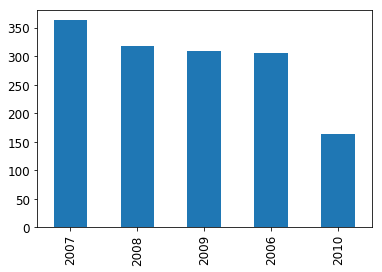

In [12]:
df_test['YrSold'].value_counts().plot.bar();

En principio no hace falta que ordenemos el dataset por fecha; lo interesante sería saber cómo es el dataset que se guarda Kaggle para la evaluación del Private Leader Board, porque igual ese sí contiene muestras futuras :(

### Pre-procesado

Como hemos podido ver en nuestro primer análisis exploratorio, tenemos un montón de NaN, que no podemos pasar al algoritmo Random Forests. Por suerte contamos con la función `proc_df` de fastai, que nos resuelve varias cuestiones:
 * Ajustar el mapeo entre categorías y números (mediante numericalize, que convierte -1 en 0, 0 en 1, etc) y quedarse únicamente con los valores numéricos.
 * Crear dummies (categorías con pocos valores posibles)
 * Manejar los missing values en columnas numéricas (fix_missing). No hace falta en las categóricas porque Pandas ya los tradujo a -1.
 * Separar la variable dependiente del resto

In [13]:
X, y, nas = proc_df(df_train, 'SalePrice')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
Id                1460 non-null int64
MSSubClass        1460 non-null int64
MSZoning          1460 non-null int8
LotFrontage       1460 non-null float64
LotArea           1460 non-null int64
Street            1460 non-null int8
Alley             1460 non-null int8
LotShape          1460 non-null int8
LandContour       1460 non-null int8
Utilities         1460 non-null int8
LotConfig         1460 non-null int8
LandSlope         1460 non-null int8
Neighborhood      1460 non-null int8
Condition1        1460 non-null int8
Condition2        1460 non-null int8
BldgType          1460 non-null int8
HouseStyle        1460 non-null int8
OverallQual       1460 non-null int64
OverallCond       1460 non-null int64
YearBuilt         1460 non-null int64
YearRemodAdd      1460 non-null int64
RoofStyle         1460 non-null int8
RoofMatl          1460 non-null int8
Exterior1st       1460 non-null 

In [14]:
X.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,2,2,2,2,2
Alley,0,0,0,0,0
LotShape,4,4,1,1,1
LandContour,4,4,4,4,4
Utilities,1,1,1,1,1


### Subconjuntos de entrenamiento y validación

Kaggle nos proporciona los siguientes ficheros de datos:
 * Train.csv : datos usados para entrenar el modelo
 * Test.csv : datos usados para determinar el ranking final -> Public LeaderBoard

Esto implica que tenemos que usar el dataset de entrenamiento también para validación.

In [15]:
def split_vals_seq(a, n): 
    return a[:n].copy(), a[n:].copy() # linear

In [16]:
# Split Secuencial
#n_trn = 1300
#X_train, X_valid = split_vals_seq(X, n_trn)
#y_train, y_valid = split_vals_seq(y, n_trn)

# Split aleatorio
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

X.shape, X_train.shape, y_train.shape, X_valid.shape

((1460, 83), (1095, 83), (1095,), (365, 83))

## Entrenamiento y test del modelo (Random Forest)

Una vez pre-procesado el dataset, procedemos con el modelo. 

Primero creamos unas funciones auxiliares para calcular todas las medidas necesarias para la evaluación del modelo:

In [17]:
def rmse(predictions, actuals): 
    return math.sqrt(((predictions - actuals)**2).mean())

def print_score(m):
    print('RMSE for training:   ', rmse(m.predict(X_train), y_train))
    print('RMSE for validation: ', rmse(m.predict(X_valid), y_valid))
    print('R^2 for training:    ', m.score(X_train, y_train))
    print('R^2 for validation:  ', m.score(X_valid, y_valid))
    if hasattr(m, 'oob_score_'): 
        print('OoB score:           ', m.oob_score_)

A continuación instanciamos la clase adecuada con el nº de estimadores (árboles de decisión) por defecto, y paralelización de trabajos:

In [18]:
m1 = RandomForestRegressor(n_jobs=-1, n_estimators=10)
%time m1.fit(X_train, y_train)
print_score(m1)

Wall time: 132 ms
RMSE for training:    0.0660004886444854
RMSE for validation:  0.15449134436930045
R^2 for training:     0.9718396103460046
R^2 for validation:   0.8621641427476963


In [19]:
m1b = RandomForestRegressor(n_jobs=-1, n_estimators=50, oob_score=True)
%time m1b.fit(X_train, y_train)
print_score(m1b)

Wall time: 263 ms
RMSE for training:    0.057368263440640825
RMSE for validation:  0.14472409979577852
R^2 for training:     0.9787241085620435
R^2 for validation:   0.8790417149913377
OoB score:            0.8495676308956388


Parece que tenemos sobreajuste por lo que se puede observar en las medidas. Confirmado cuando subimos nuestra salida a Kaggle (error: 0,15)

Vamos a intentar mejorar el sobreajuste tocando un poco sus parámetros (luego al final usaremos grid search para elegir los valores óptimos):

In [20]:
m1c = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_features=0.5, n_jobs=-1, oob_score=True)
m1c.fit(X_train, y_train)
print_score(m1c)

RMSE for training:    0.06591389832688506
RMSE for validation:  0.14048558430020283
R^2 for training:     0.9719134527546065
R^2 for validation:   0.8860229450461273
OoB score:            0.8652644391222157


Hemos conseguido una mejora notable :)

Por último probamos con Extra Trees para comparar:

In [21]:
m2 = ExtraTreesRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5, n_jobs=-1, 
                        bootstrap=True, oob_score=True)
m2.fit(X_train, y_train)
print_score(m2)

RMSE for training:    0.115764028827396
RMSE for validation:  0.15710269415963365
R^2 for training:     0.9133653503547468
R^2 for validation:   0.857465114059934
OoB score:            0.8393917497276987


## Importancia de las variables
Podemos ver cuál es la importancia de cada una de las variables presentes en el dataset. Esto nos puede ayudar a reducir el número de columnas para generalizar mejor y crear un modelo más simple y rápido.

Como tenemos pocas muestras no hace falta usar sólo una parte

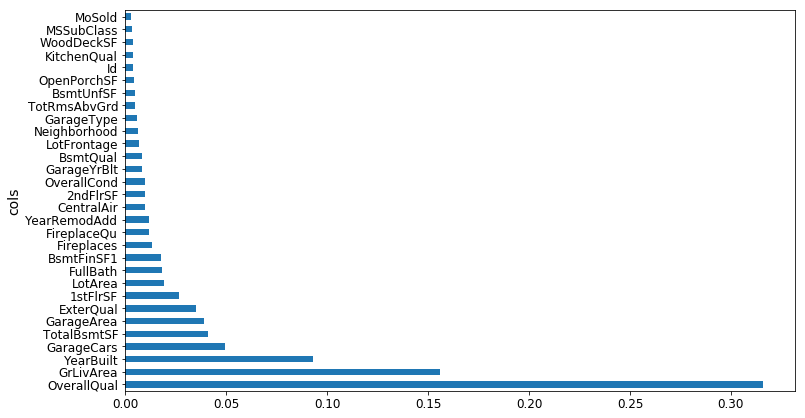

In [22]:
fi = rf_feat_importance(m1c, X_train)

def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [23]:
cols_to_keep = fi[fi.imp>0.005].cols

if 'Id' not in cols_to_keep:
    cols_to_keep.loc[0] = 'Id' # Necesaria para el submit
    
print(len(cols_to_keep))

C:\Users\Yago\.conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


24


Creamos de nuevo los subconjuntos de entrenamiento y validación sin las columnas menos importantes, entrenamos el modelo y a ver cómo se comporta...

In [24]:
X_train = X_train[cols_to_keep].copy()
X_valid = X_valid[cols_to_keep].copy()

m = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.06766943924502218
RMSE for validation:  0.14126365959277254
R^2 for training:     0.9703974234210033
R^2 for validation:   0.8847569316800667
OoB score:            0.8673709373916434


Como los resultados son prácticamente iguales nos quedamos con este modelo más simple. Aunque deberíamos pensar en probar otras cosas, ya que el dataset de entrenamiento es tan pequeño como el de test, y no sabemos si nuestro subconjunto de validación es bueno o no.

## One hot encoding

Vamos a intentar dividir las columnas categóricas con pocos valores en nuevas columnas, para ver qué ocurre.

In [25]:
X_2, y, nas = proc_df(df_train, 'SalePrice', max_n_cat=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_2, y, random_state=42)

In [26]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.06592215766120454
RMSE for validation:  0.1405667142743752
R^2 for training:     0.9719064135497242
R^2 for validation:   0.8858912642674295
OoB score:            0.868808293257409


El resultado es más o menos, pero con esto mejoramos la interpretabilidad

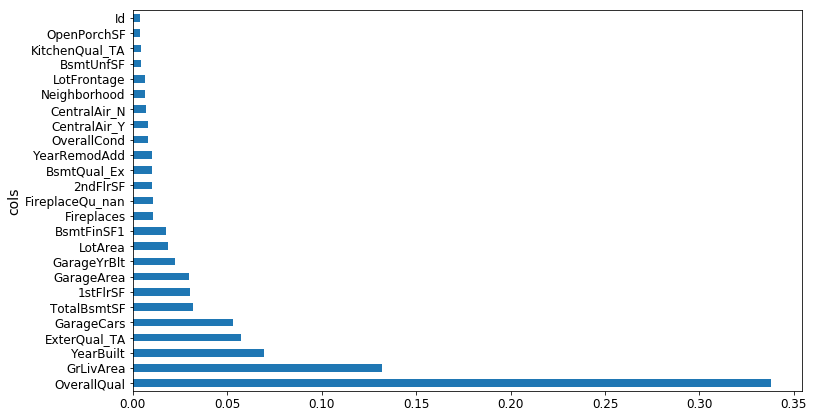

In [27]:
fi = rf_feat_importance(m, X_2)
plot_fi(fi[:25]);

## Eliminación de redundancia

In [28]:
from scipy.cluster import hierarchy as hc
X_keep = X[cols_to_keep].copy()

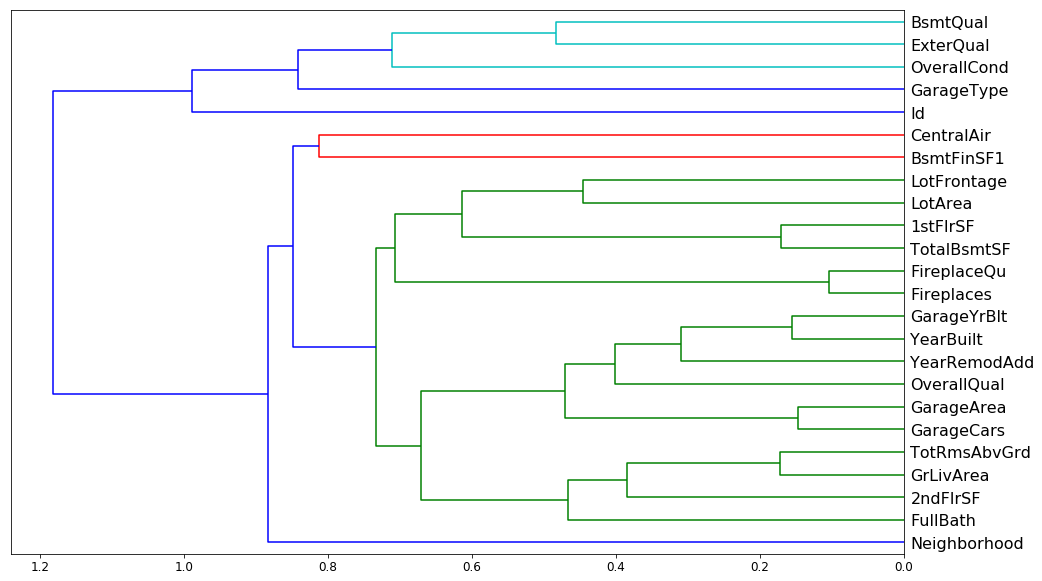

In [29]:
corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4) # correlation matrix
corr_condensed = hc.distance.squareform(1-corr)                  # distances matrix
z = hc.linkage(corr_condensed, method='average')                 # hierarchical/agglomerative clustering

fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Existen varios pares de variables similares (las que se separan más hacia el borde de la derecha). Vamos a tratar de quitar una a una del modelo para ver cómo se ve afectado el OoB:

In [30]:
def get_oob(df_x):
    m = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_features=0.5, n_jobs=-1, oob_score=True)
    X_train, X_valid, y_train, y_valid = train_test_split(df_x, y, random_state=42)
    m.fit(X_train, y_train)
    return m.oob_score_

In [31]:
# Partimos de un OoB base
get_oob(X_keep)

0.870340837290076

In [32]:
for c in ('BsmtQual', 'ExterQual', 'LotFrontage', 'LotArea', '1stFlrSF', 'TotalBsmtSF',
         'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'YearBuilt', 'GarageArea', 'GarageCars'):
    print(c, get_oob(X_keep.drop(c, axis=1)))

BsmtQual 0.8656473250683927
ExterQual 0.8668167614996982
LotFrontage 0.8680486161439684
LotArea 0.8636033287592373
1stFlrSF 0.8671990370621621
TotalBsmtSF 0.8655590406126261
Fireplaces 0.8673325466796687
FireplaceQu 0.868095873893465
GarageYrBlt 0.8647123510965575
YearBuilt 0.8657856446370125
GarageArea 0.8663054150871516
GarageCars 0.8691457456407464


Parece que podemos quitar una de cada par (la que su ausencia suba más el OoB score) pero los resultados no van a mejorar:

In [33]:
cols_to_drop = ['BsmtQual', 'LotFrontage', '1stFlrSF', 'FireplaceQu', 'GarageYrBlt', 'GarageArea']
get_oob(X_keep.drop(cols_to_drop, axis=1))

0.8653532760452025

El resultado es mejor, así que nos quedamos con este modelo

In [34]:
X_keep.drop(cols_to_drop, axis=1, inplace=True)
X_keep.shape

(1460, 18)

In [35]:
for col in cols_to_drop:
    cols_to_keep.drop(cols_to_keep[cols_to_keep == col].index[0], inplace=True)

## Grid Search

Vamos a intentar optimizar los parámetros del modelo:

In [36]:
#n_param_list = {'n_estimators':[50,60,70,80,90,100,110,120,130,140,150,160],
#                'min_samples_leaf':[2,3,4,5,6,7],
#                'max_features':[None, 0.3, 0.4, 0.5, 0.6, 'sqrt', 'log2']
#               }
#m = RandomForestRegressor(n_jobs=-1, oob_score=True, random_state = 42)
#grid_search = GridSearchCV(estimator = m, param_grid = n_param_list)
X_train, X_valid, y_train, y_valid = train_test_split(X_keep, y, random_state=42)
#grid_search.fit(X_train, y_train)
#print(grid_search.best_params_)

In [37]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.06848448253128463
RMSE for validation:  0.14115727247487736
R^2 for training:     0.9696800336373033
R^2 for validation:   0.8849304478019456
OoB score:            0.872157011061707


## Aplicación del modelo al conjunto de test

Creamos una función para aplicar nuestro modelo a los datos de test, predecir la variable target, y crear el fichero para su envío a Kaggle:

In [38]:
def test_and_submit(m):
    
    # Usamos la función apply_cats de fastai para replicar lo que hicimos con train_cats sobre el dataset de entrenamiento
    apply_cats(df_test, df_train)
    
    # Aplicamos el pre-procesado para obtener el dataframe de entrada al modelo
    X_test, _, _ = proc_df(df_test, na_dict=nas)
    
    if cols_to_keep is not None:
        X_test_keep = X_test[cols_to_keep].copy()
    else:
        X_test_keep = X_test
                
    # Aplicamos el modelo a los datos de test para predecir los valores de salida
    y_pred = m.predict(X_test_keep)
    
    # Por último creamos el fichero para enviar a Kaggle!
    submission = pd.DataFrame()
    submission['Id'] = X_test_keep.Id
    submission['SalePrice'] = np.exp(y_pred) # Deshacemos el logaritmo aplicado en el modelo
    submission.to_csv(f'results/submission.csv',index=False)

Finalmente aplicamos el mejor modelo sobre los datos de test:

In [39]:
test_and_submit(m)

Hemos mejorado un poco (error: 0,145), pero aún estamos lejos de obtener una posición decente. 

Próximos pasos:
* Limpieza del dataset
* Feature Engineering
* Elección de un subconjunto de validación que se parezca lo máximo posible al de test
* Otros algoritmos